In [1]:
pip install pandas_datareader==0.9.0


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime
import yfinance as yf

In [4]:


start_date = datetime.datetime.now() - datetime.timedelta(days=365 * 10)  # 10 years ago
end_date = datetime.datetime.now()


ticker = "AAPL"  

# Fetch the data from Yahoo Finance
df = yf.download(ticker, start=start_date, end=end_date)#Alternate df = pdr.DataReader(ticker, 'yahoo', start_date, end_date)

print(df.head())

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2013-07-22  15.337857  15.348214  15.195357  15.225357  13.218612  207796400
2013-07-23  15.214286  15.248571  14.953929  14.963929  12.991638  369395600
2013-07-24  15.676071  15.878214  15.545000  15.732500  13.658914  591936800
2013-07-25  15.739286  15.764286  15.564643  15.660714  13.596584  229493600
2013-07-26  15.546429  15.751429  15.512143  15.749643  13.673793  200152400


In [5]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-07-22,15.337857,15.348214,15.195357,15.225357,13.218612,207796400
1,2013-07-23,15.214286,15.248571,14.953929,14.963929,12.991638,369395600
2,2013-07-24,15.676071,15.878214,15.545000,15.732500,13.658914,591936800
3,2013-07-25,15.739286,15.764286,15.564643,15.660714,13.596584,229493600
4,2013-07-26,15.546429,15.751429,15.512143,15.749643,13.673793,200152400


In [6]:
df = df.drop(['Adj Close'], axis=1)
df.head()


,Date,Open,High,Low,Close,Volume
0,2013-07-22,15.337857,15.348214,15.195357,15.225357,207796400
1,2013-07-23,15.214286,15.248571,14.953929,14.963929,369395600
2,2013-07-24,15.676071,15.878214,15.545000,15.732500,591936800
3,2013-07-25,15.739286,15.764286,15.564643,15.660714,229493600
4,2013-07-26,15.546429,15.751429,15.512143,15.749643,200152400


In [7]:
#df = df.drop(0),
#f.head()

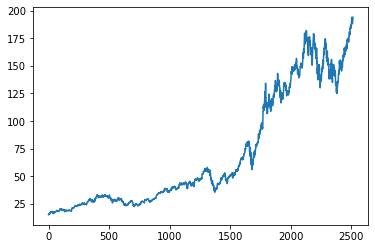

In [8]:
plt.plot(df.Close)

In [9]:
ma100 = df['Close'].rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2509    168.6110
2510    168.9554
2511    169.3237
2512    169.7051
2513    170.1602
Name: Close, Length: 2514, dtype: float64

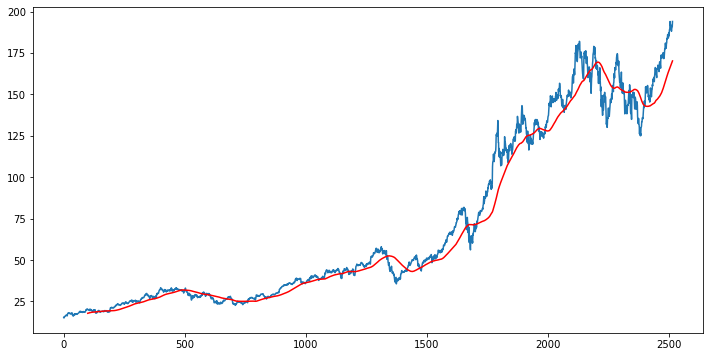

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [13]:
ma200 = df['Close'].rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2509    155.67140
2510    155.85655
2511    156.05710
2512    156.25670
2513    156.46785
Name: Close, Length: 2514, dtype: float64

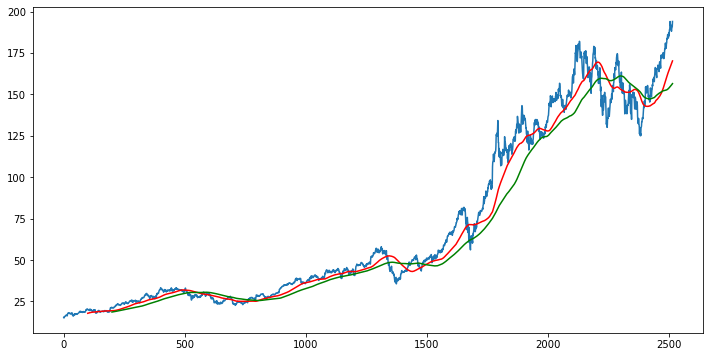

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [17]:
df.shape

(2514, 6)

In [18]:
#splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)



(1759, 1)
(755, 1)


In [19]:
data_training.head()

,Close
0,15.225357
1,14.963929
2,15.732500
3,15.660714
4,15.749643


In [20]:
data_testing.head()

,Close
1759,96.522499
1760,96.327499
1761,98.357498
1762,97.000000
1763,97.272499


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [22]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00315883],
       [0.        ],
       [0.00928662],
       ...,
       [0.97284354],
       [0.99193467],
       [1.        ]])

In [23]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train = np.array(x_train), np.array(y_train)

In [24]:
#ML model

from keras.layers import Dense,Dropout, LSTM
from keras.models import Sequential

In [26]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
#layer2
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
#layer3
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
#layer4
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))


#Add dense layer to add all layers

model.add(Dense(units = 1))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [28]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 50)

Epoch 1/50
52/52 [==============================] - 47s 426ms/step - loss: 0.0270
Epoch 2/50
52/52 [==============================] - 24s 469ms/step - loss: 0.0057
Epoch 3/50
52/52 [==============================] - 24s 457ms/step - loss: 0.0041
Epoch 4/50
52/52 [==============================] - 22s 424ms/step - loss: 0.0047
Epoch 5/50
52/52 [==============================] - 22s 415ms/step - loss: 0.0045
Epoch 6/50
52/52 [==============================] - 22s 427ms/step - loss: 0.0049
Epoch 7/50
52/52 [==============================] - 24s 453ms/step - loss: 0.0036
Epoch 8/50
52/52 [==============================] - 24s 452ms/step - loss: 0.0038
Epoch 9/50
52/52 [==============================] - 24s 457ms/step - loss: 0.0033
Epoch 10/50
52/52 [==============================] - 24s 453ms/step - loss: 0.0035
Epoch 11/50
52/52 [==============================] - 23s 446ms/step - loss: 0.0035
Epoch 12/50
52/52 [==============================] - 24s 454ms/step - loss: 0.0029
Epoch 13/50
5

In [32]:
model.save('keras_model.h5')

In [34]:
data_testing.head()

,Close
1759,96.522499
1760,96.327499
1761,98.357498
1762,97.000000
1763,97.272499


In [35]:
data_training.tail(100)

,Close
1659,74.544998
1660,72.019997
1661,73.162498
1662,68.379997
1663,68.339996
...,...
1754,95.752502
1755,95.919998
1756,95.477501
1757,97.057503


In [36]:
#Predicting the value of testing data we need previous 100 days value


past_100_days = data_training.tail(100)


In [38]:
#final_df= past_100_days.append(data_testing,ignore_index=True)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [39]:
final_df.head()

,Close
0,74.544998
1,72.019997
2,73.162498
3,68.379997
4,68.339996


In [40]:
input_data = scaler.fit_transform(final_df)

In [41]:
input_data.shape

(855, 1)

In [42]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [43]:
x_test,y_test = np.array(x_test),np.array(y_test)

In [44]:
print(x_test.shape)
print(y_test.shape)


(755, 100, 1)
(755,)


In [45]:
#Making Predictiions

y_predicted = model.predict(x_test)


24/24 [==============================] - 2s 61ms/step


In [46]:
y_predicted.shape

(755, 1)

In [47]:
y_test

array([0.29318877, 0.29177468, 0.30649575, 0.29665149, 0.29862759,
       0.26652043, 0.2648525 , 0.28077011, 0.26947553, 0.28243804,
       0.29077758, 0.36380283, 0.38321941, 0.38849507, 0.39137764,
       0.41922439, 0.39899202, 0.4107036 , 0.38639206, 0.41275223,
       0.42725576, 0.42651244, 0.42433689, 0.43126234, 0.43231382,
       0.45093276, 0.49513226, 0.50591922, 0.49843177, 0.51074165,
       0.49977338, 0.4983049 , 0.52899792, 0.56627198, 0.54611209,
       0.46982357, 0.47040372, 0.41137438, 0.44400731, 0.41623304,
       0.40542793, 0.42979386, 0.43109918, 0.40637064, 0.39338998,
       0.36800881, 0.39150456, 0.40405008, 0.37003935, 0.37801628,
       0.40745842, 0.42689314, 0.42058409, 0.43305713, 0.44016388,
       0.41282471, 0.43806087, 0.41384001, 0.42776338, 0.42696568,
       0.4414692 , 0.4953498 , 0.47141896, 0.47207165, 0.46859078,
       0.45633528, 0.43428997, 0.44538516, 0.44074404, 0.43262204,
       0.4274733 , 0.42754583, 0.43878603, 0.3996265 , 0.42950

In [48]:
y_predicted

array([[0.26717037],
       [0.27284116],
       [0.27828464],
       [0.28347808],
       [0.28832448],
       [0.29273406],
       [0.29642564],
       [0.29917055],
       [0.3009839 ],
       [0.30194014],
       [0.3022258 ],
       [0.3020815 ],
       [0.3021475 ],
       [0.30336392],
       [0.30642816],
       [0.31154144],
       [0.31893685],
       [0.3282029 ],
       [0.338827  ],
       [0.34989682],
       [0.36087537],
       [0.37156883],
       [0.38184226],
       [0.3915255 ],
       [0.40053952],
       [0.40882063],
       [0.41654947],
       [0.4244126 ],
       [0.4330204 ],
       [0.44250643],
       [0.45284873],
       [0.46361223],
       [0.4742151 ],
       [0.48459953],
       [0.49529594],
       [0.50627446],
       [0.5159783 ],
       [0.523127  ],
       [0.5262879 ],
       [0.5253422 ],
       [0.5205272 ],
       [0.5124378 ],
       [0.5021887 ],
       [0.49086875],
       [0.47915298],
       [0.46742207],
       [0.45574415],
       [0.444

In [49]:
scaler.scale_

array([0.00725176])

In [50]:
scale_factor = 1/0.00725176

y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

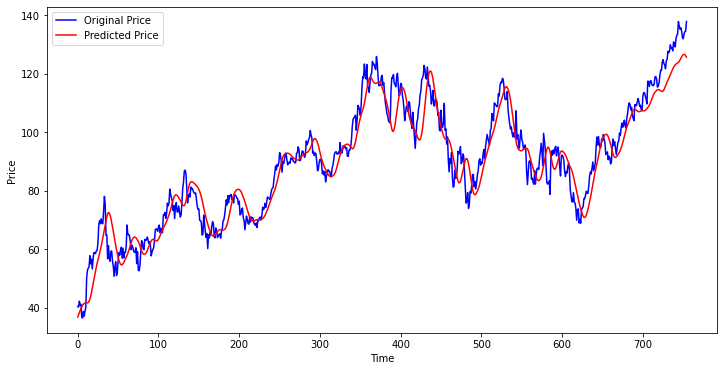

In [51]:
plt.figure(figsize =(12,6) )
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()